# Import Required Libraries

In [2]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt

In [6]:
print("Pandas Version is "+ pd.__version__)

Pandas Version is 0.25.1


# Create Data

The data set will consist of 1,000 baby names and the number of births recorded for that year (1880). We will also add plenty of duplicates so you will see the same baby name more than once. You can think of the multiple entries per name simply being different hospitals around the country reporting the number of births per baby name. So if two hospitals reported the baby name "Bob", the data will have two values for the name Bob. We will start by creating the random set of baby names.

In [7]:
names = ["Bob", "Jessica", "Mary", "John", "Mel"]

In [9]:
random.seed(500)
random_names = [names[random.randint(low = 0, high = len(names))] for i in range(1000)]
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

In [10]:
births = [random.randint(low = 0, high = 1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

In [11]:
BabyDataset = list(zip(random_names, births))
BabyDataset[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

In [13]:
data = pd.DataFrame(data = BabyDataset, columns=["Names", "Births"])
data[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


# Export Data to CSV

In [14]:
data.to_csv("BirthDataset.txt", index=False, header=False)

# Get Data

In [21]:
Location = r'C:\Users\Neerav\BirthDataset.txt'

In [22]:
df = pd.read_csv(Location)

In [23]:
df[:10]

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124
5,Jessica,155
6,Mary,403
7,Mary,199
8,Mary,191
9,John,769


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Mary    999 non-null object
968     999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [26]:
df.head()

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124


In [28]:
df = pd.read_csv(Location, header=None)
df.head()

,0,1
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


In [30]:
df = pd.read_csv(Location, names = ["Names", "Births"])
df.head()

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


In [39]:
# Method 1
df["Names"].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [42]:
for x in df["Names"].unique():
    print(x)

Mary
Jessica
Bob
John
Mel


In [43]:
# Method 2

print(df["Names"].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


In [46]:
name = df.groupby("Names")
df = name.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


In [47]:
# Method 1

Sorted = df.sort_values(['Births'], ascending=False)
Sorted

,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
John,90705


In [48]:
# Method 2

df["Births"].max()

106817

# Present Data

The Most Popular Names


,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
John,90705


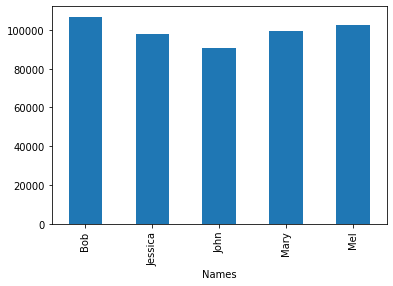

In [50]:
df["Births"].plot.bar()
print("The Most Popular Names")
df.sort_values(by = "Births", ascending=False)